##  Challenge: make your own regression model
In this notebook, I am going to take the data from 2.4.2 and run a multivariable regression model on it. I am then going to make some features and rerun the model to see if it improves. My goal here is specifically on prediction.

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import linear_model
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [48]:
#data import
da = pd.read_csv(r'C:\Users\jmfra\OneDrive\Documents\Thinkful Data Science Files\2.4.2 drill data\table8.csv')
da

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,Unnamed: 13
0,Adams Village,"1,861",0,0.000,nan,0,0,0,12,2,10,0,0.000,nan
1,Addison Town and Village,"2,577",3,0.000,nan,0,0,3,24,3,20,1,0.000,nan
2,Akron Village,"2,846",3,0.000,nan,0,0,3,16,1,15,0,0.000,nan
3,Albany,"97,956",791,8.000,nan,30,227,526,"4,090",705,"3,243",142,nan,nan
4,Albion Village,"6,388",23,0.000,nan,3,4,16,223,53,165,5,nan,nan
5,Alfred Village,"4,089",5,0.000,nan,0,3,2,46,10,36,0,nan,nan
6,Allegany Village,"1,781",3,0.000,nan,0,0,3,10,0,10,0,0.000,nan
7,Amherst Town,"118,296",107,1.000,nan,7,31,68,"2,118",204,"1,882",32,3.000,nan
8,Amityville Village,"9,519",9,0.000,nan,2,4,3,210,16,188,6,1.000,nan
9,Amsterdam,"18,182",30,0.000,nan,0,12,18,405,99,291,15,0.000,nan


In [49]:
#first we need to fill in Nan values with 0 to avoid errors and get rid of the
#empty rows at the bottom
da.fillna(value=0)
da = da[0:348]

In [50]:
#as described in the drill, we only need population, murder, robbery, and 
#property crime so lets make a new dataframe and shorten the data set
dp = []
dp = da[['Population']]
dp['Murder'] = da[['Murder and\nnonnegligent\nmanslaughter']]
dp['Robbery'] = da[['Robbery']]
dp['Property_Crime'] = da[['Property\ncrime']]
dp

c:\users\jmfra\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
c:\users\jmfra\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\jmfra\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



,Population,Murder,Robbery,Property_Crime
0,"1,861",0.000,0,12
1,"2,577",0.000,0,24
2,"2,846",0.000,0,16
3,"97,956",8.000,227,"4,090"
4,"6,388",0.000,4,223
5,"4,089",0.000,3,46
6,"1,781",0.000,0,10
7,"118,296",1.000,31,"2,118"
8,"9,519",0.000,4,210
9,"18,182",0.000,12,405


In [51]:
#we need to remove commas from the entries so that we can turn the data into
#integers that we can work with
dp['Population'] = dp.Population.str.replace(',','')
dp['Property_Crime'] = dp.Property_Crime.str.replace(',','')
dp['Robbery'] = dp.Robbery.str.replace(',','')
dp

c:\users\jmfra\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\jmfra\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
c:\users\jmfra\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is 

,Population,Murder,Robbery,Property_Crime
0,1861,0.000,0,12
1,2577,0.000,0,24
2,2846,0.000,0,16
3,97956,8.000,227,4090
4,6388,0.000,4,223
5,4089,0.000,3,46
6,1781,0.000,0,10
7,118296,1.000,31,2118
8,9519,0.000,4,210
9,18182,0.000,12,405


In [52]:
#the dataframe still thinks they are strings, we need to fix that
dp['Population'] = pd.to_numeric(dp['Population'])
dp['Robbery'] = pd.to_numeric(dp['Robbery'])
dp['Property_Crime'] = pd.to_numeric(dp['Property_Crime'])

c:\users\jmfra\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\jmfra\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\jmfra\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

In [53]:
#as described in the problem, we need to now create a population^2 column and 
#turn murder and robbery into a binary where 0=0 and any number above 0=1
dp['Population Squared'] = np.square(dp['Population'])
dp['Murder'] = np.where(dp['Murder'] >= 1, 1, 0)
dp['Robbery'] = np.where(dp['Robbery'] >= 1, 1, 0)
dp

c:\users\jmfra\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\jmfra\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
c:\users\jmfra\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is 

,Population,Murder,Robbery,Property_Crime,Population Squared
0,1861,0,0,12,3463321
1,2577,0,0,24,6640929
2,2846,0,0,16,8099716
3,97956,1,1,4090,9595377936
4,6388,0,1,223,40806544
5,4089,0,1,46,16719921
6,1781,0,0,10,3171961
7,118296,1,1,2118,13993943616
8,9519,0,1,210,90611361
9,18182,0,1,405,330585124



Coefficients: 
 [[  3.46570325e-02   1.51866750e+01  -9.62775946e+01  -2.11107931e-09]]

Intercept: 
 [-109.57564946]

R-squared:
0.996124710498


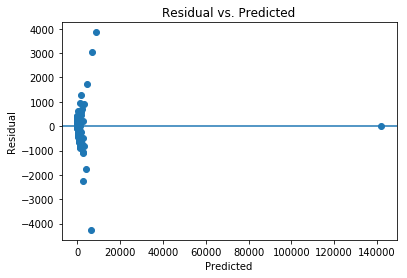

In [54]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = dp['Property_Crime'].values.reshape(-1, 1)
X = dp[['Population','Murder','Robbery', 'Population Squared']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))
predicted = regr.predict(X).ravel()
actual = dp['Property_Crime']
residual = actual - predicted
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

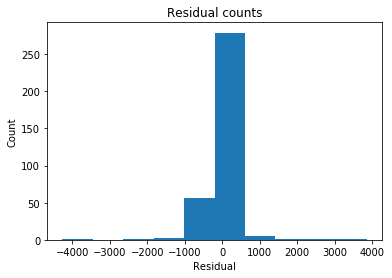

In [55]:
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

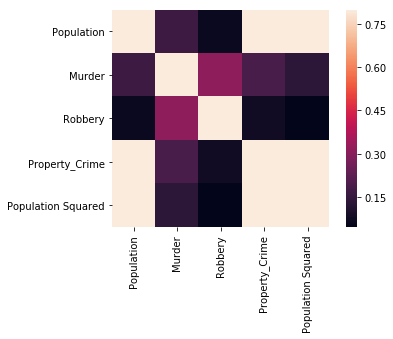

In [56]:
#this data is not what we want to see. The overwhelming outlier happens to land
#right on the 0 line, meaning it skews the data heavily, causing overfitting.
#we would expect this same test run on a set without a similar outlier to have 
#completely different results.
#let's start by checking to see if any of the independent variables have a 
#high correlation and can be grouped
corrmat = dp.corr()
f, ax = plt.subplots()
sns.heatmap(corrmat, vmax = .8, square=True)
plt.show()

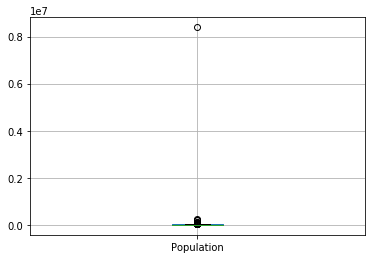

In [57]:
#let's check out data trends 
dp.boxplot(column = 'Population')

In [58]:
#again, seems obvious there is an overwelming outlier so lets get rid of it
dp[dp['Population'] > 100000]['Population']

7       118296
35      258789
216    8396126
272     210562
310     143834
346     199134
Name: Population, dtype: int64

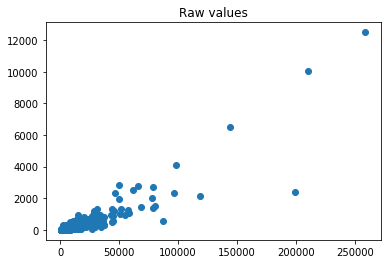

In [59]:
dp = dp.drop([216])
plt.scatter(dp['Population'], dp['Property_Crime'])
plt.title('Raw values')
plt.show()

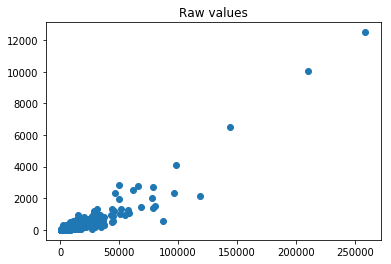

In [60]:
#You will also notice that at roughly 200000, there is a point clearly not on
#the roughly linear correlation so let us also get rid of that. Through trial
#and error, getting rid of this points does greatly increase R^2 value at the 
#end.
dp = dp.drop([346])
plt.scatter(dp['Population'], dp['Property_Crime'])
plt.title('Raw values')
plt.show()

(-50, 50000)

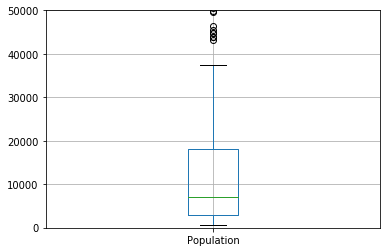

In [61]:
dp.boxplot(column = 'Population')
plt.ylim(-50, 50000)

In [62]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = dp['Property_Crime'].values.reshape(-1, 1)
X = dp[['Population','Murder','Robbery', 'Population Squared']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[  1.32534320e-02   1.87915088e+02   7.78911791e+01   1.40350011e-07]]

Intercept: 
 [-19.24426855]

R-squared:
0.926518347983


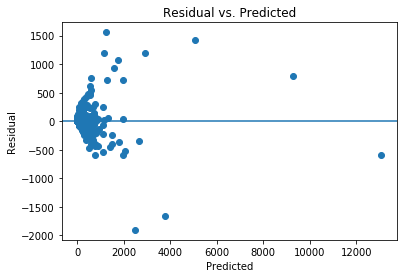

In [63]:
#plot the residual
predicted = regr.predict(X).ravel()
actual = dp['Property_Crime']
residual = actual - predicted
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

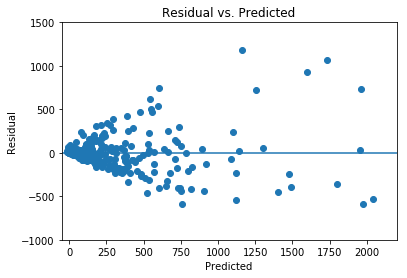

In [64]:
#zoom in on the values to see if the plot is roughly random
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.xlim(-50, 2200)
plt.ylim(-1000, 1500)
plt.show()

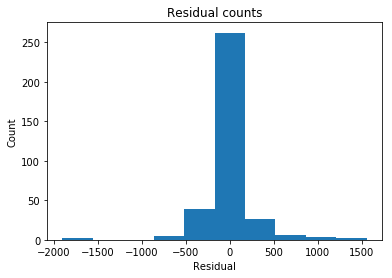

In [65]:
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

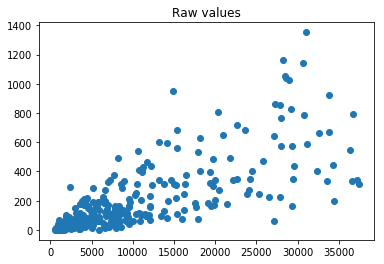

In [66]:
dp = dp[dp.Population < 40000]
plt.scatter(dp['Population'], dp['Property_Crime'])
plt.title('Raw values')
plt.show()


Coefficients: 
 [[  1.68488382e-02   9.07313670e+01   9.00961202e+01  -2.75945666e-08]]

Intercept: 
 [-27.70310902]

R-squared:
0.613947879663


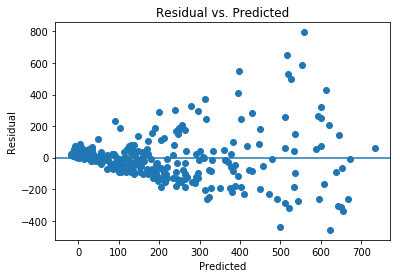

In [67]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = dp['Property_Crime'].values.reshape(-1, 1)
X = dp[['Population','Murder','Robbery', 'Population Squared']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))
predicted = regr.predict(X).ravel()
actual = dp['Property_Crime']
residual = actual - predicted
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

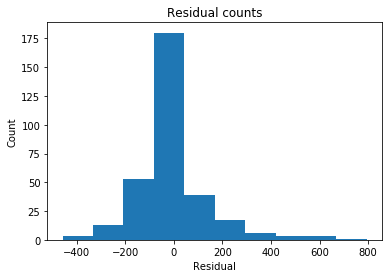

In [68]:
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()